Robot Ear:

Frontend:
* Website where users can upload audio
* React, Express, Node, RESTful API

Backend:

 * Segmentation: either energy, spectral peaks or onset detection to separate the song into individual notes

* Classifier: this code here; currently the classification is based on frequency, but I want to switch over to a machine learning model that uses image classification on the spectrograms of the audio; I think this will be more robust when we want to classify notes with poor audio quality or chords

* Transciprtion: Converting the notes we find into sheet music; there is a python library called Abjad that we can use; you give it a LaTeX style string and it generates the sheet music

Database of labeled notes: https://magenta.tensorflow.org/datasets/nsynth#files

In [ ]:
# imports

import numpy as np
import math
import wave
import os
import struct
import pandas as pd
import matplotlib.pylab as plt
import librosa
import seaborn as sns
from itertools import cycle

In [ ]:
# graph pallete
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
#install these libraries ----



def note_detect(audio_file):

	#-------------------------------------------
	#here we are just storing our sound file as a numpy array
	#you can also use any other method to store the file as an np array
	file_length=audio_file.getnframes()
	f_s=audio_file.getframerate() #sampling frequency
	sound = np.zeros(file_length) #blank array



	for i in range(file_length) :
		wdata=audio_file.readframes(1)
		data=struct.unpack("<h",wdata)
		sound[i] = int(data[0])

	# plt.plot(sound)
	# plt.show()

	sound=np.divide(sound,float(2**15)) #scaling it to 0 - 1
	counter = audio_file.getnchannels() #number of channels mono/sterio
	#-------------------------------------------

	# plt.plot(sound)
	# plt.show()

	#fourier transformation from numpy module
	fourier = np.fft.fft(sound)
	fourier = np.absolute(fourier)
	imax=np.argmax(fourier[0:int(file_length/2)]) #index of max element

	# plt.plot(fourier)
	# plt.show()

	#peak detection
	i_begin = -1
	threshold = 0.3 * fourier[imax]
	for i in range (0,imax+100):
		if fourier[i] >= threshold:
			if(i_begin==-1):
				i_begin = i
		if(i_begin!=-1 and fourier[i]<threshold):
			break
	i_end = i
	imax = np.argmax(fourier[0:i_end+100])

	freq=(imax*f_s)/(file_length*counter) #formula to convert index into sound frequency

	#frequency database
	note=0
	name = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0","C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1","C2","C#2","D2","D#2","E2","F2","F#2","G2","G2#","A2","A2#","B2","C3","C3#","D3","D3#","E3","F3","F3#","G3","G3#","A3","A3#","B3","C4","C4#","D4","D4#","E4","F4","F4#","G4","G4#","A4","A4#","B4","C5","C5#","D5","D5#","E5","F5","F5#","G5","G5#","A5","A5#","B5","C6","C6#","D6","D6#","E6","F6","F6#","G6","G6#","A6","A6#","B6","C7","C7#","D7","D7#","E7","F7","F7#","G7","G7#","A7","A7#","B7","C8","C8#","D8","D8#","E8","F8","F8#","G8","G8#","A8","A8#","B8","Beyond B8"])
	frequencies = np.array([16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96	,27.50	,29.14	,30.87	,32.70	,34.65	,36.71	,38.89	,41.20	,43.65	,46.25	,49.00	,51.91	,55.00	,58.27	,61.74	,65.41	,69.30	,73.42	,77.78	,82.41	,87.31	,92.50	,98.00	,103.83	,110.00	,116.54	,123.47	,130.81	,138.59	,146.83	,155.56	,164.81	,174.61	,185.00	,196.00	,207.65	,220.00	,233.08	,246.94	,261.63	,277.18	,293.66	,311.13	,329.63	,349.23	,369.99	,392.00	,415.30	,440.00	,466.16	,493.88	,523.25	,554.37	,587.33	,622.25	,659.26	,698.46	,739.99	,783.99	,830.61	,880.00	,932.33	,987.77	,1046.50	,1108.73	,1174.66	,1244.51	,1318.51	,1396.91	,1479.98	,1567.98	,1661.22	,1760.00	,1864.66	,1975.53	,2093.00	,2217.46	,2349.32	,2489.02	,2637.02	,2793.83	,2959.96	,3135.96	,3322.44	,3520.00	,3729.31	,3951.07	,4186.01	,4434.92	,4698.64	,4978.03	,5274.04	,5587.65	,5919.91	,6271.93	,6644.88	,7040.00	,7458.62	,7902.13,8000])

	#searching for matched frequencies
	for i in range(0,frequencies.size-1):
			if(freq<frequencies[0]):
				note=name[0]
				break
			if(freq>frequencies[-1]):
				note=name[-1]
				break
			if freq>=frequencies[i] and frequencies[i+1]>=freq :
				if freq-frequencies[i]<(frequencies[i+1]-frequencies[i])/2 :
					note=name[i]
				else :
					note=name[i+1]
				break


	return note


first = wave.open("/content/internet_note.wav")
print("note = ", note_detect(first))


note =  A5#


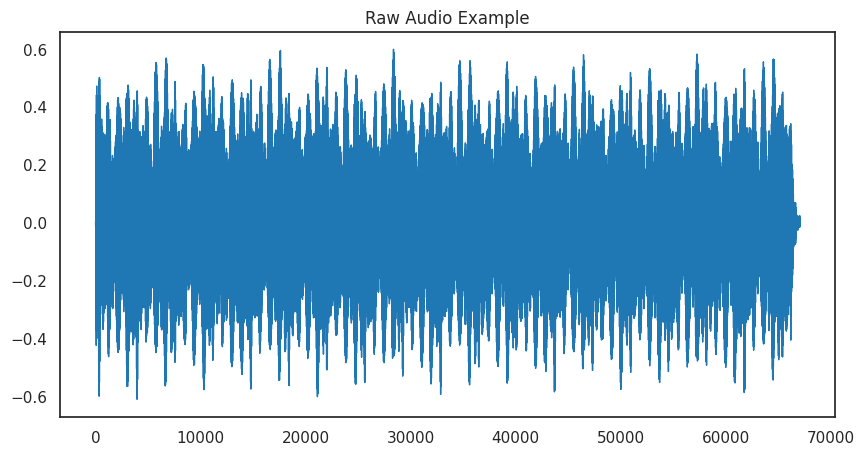

In [ ]:

y, sr = librosa.load("/content/internet_note.wav")
y_trimmed, _ = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
audio, sr = get_audio()

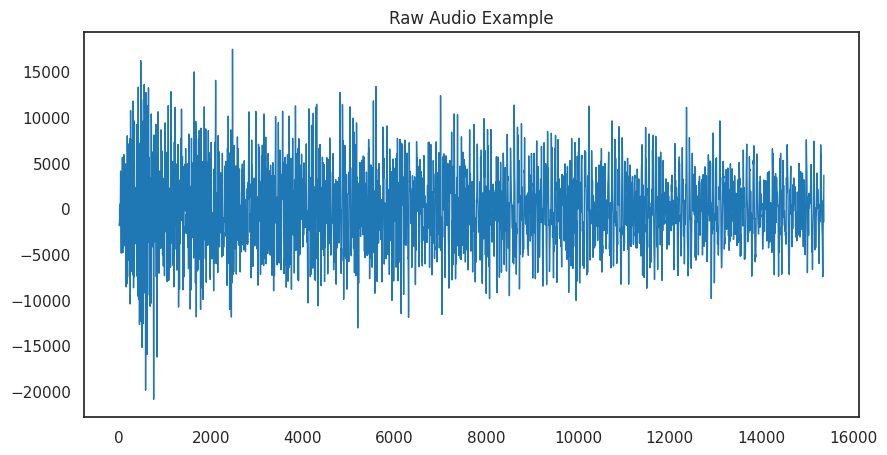

In [ ]:
y_trimmed, _ = librosa.effects.trim(audio, top_db=5)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [ ]:
import soundfile as sf
sf.write('mic.wav', audio, 48000, 'PCM_24')

In [ ]:
mic = wave.open("/content/mic.wav")
print("note = ", note_detect(mic))

error: ignored